In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
from numpy import mean
from numpy import absolute
from numpy import sqrt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
bike = pd.read_csv("Bike Sharing Dataset.csv", usecols=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
bike.info()
bike.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,january,0,no,saturday,no,clear,0.24,0.2879,0.81,0.0,3,13,16
1,spring,0,january,1,no,saturday,no,clear,0.22,0.2727,0.80,0.0,8,32,40
2,spring,0,january,2,no,saturday,no,clear,0.22,0.2727,0.80,0.0,5,27,32
3,spring,0,january,3,no,saturday,no,clear,0.24,0.2879,0.75,0.0,3,10,13
4,spring,0,january,4,no,saturday,no,clear,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike.info()
print(bike.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp

In [5]:
bike['workingday'] = bike.workingday.factorize()[0]
bike['weathersit'] = bike.weathersit.factorize()[0]
bike['season'] = bike.season.factorize()[0]
bike['mnth'] = bike.mnth.factorize()[0]
bike['weekday'] = bike.weekday.factorize()[0]
bike['holiday'] = bike.holiday.factorize()[0]


est = smf.ols('cnt ~ hr + workingday + temp', bike).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2259.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:08:54   Log-Likelihood:            -1.1218e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17375   BIC:                         2.244e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -84.6416      3.906    -21.669      0.000     -92.298     -76.985
hr             9.0494      0.170     53.100      0.000       8.715       9.383
workingday     3.7938      2.512      1.511      0.131      -1.129       8.717
temp         336.0729      6.129     54.834      0.000     324.060     348.086
==============================================================================
Omnibus:                     3951.373   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8470.361
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

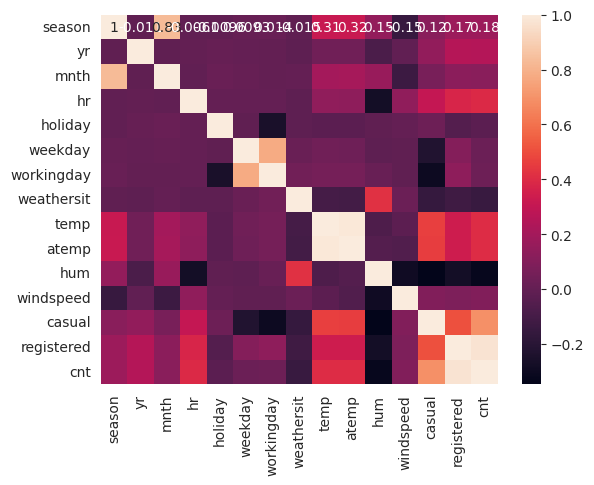

In [6]:
corr_matrix = bike.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

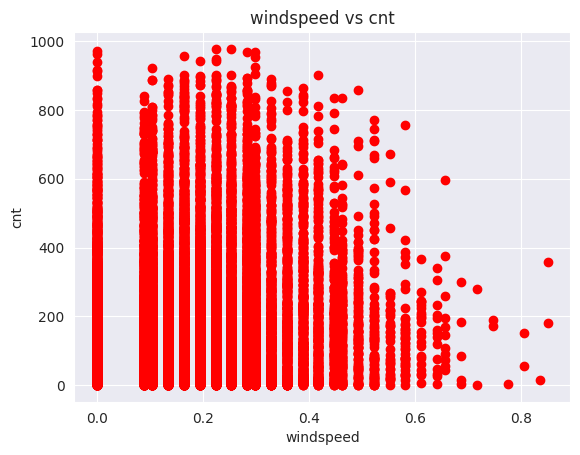

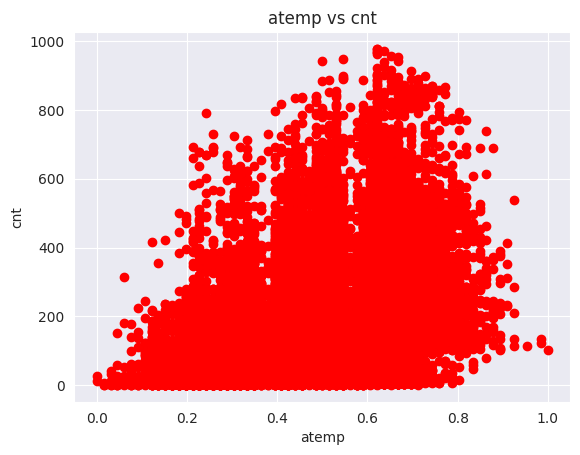

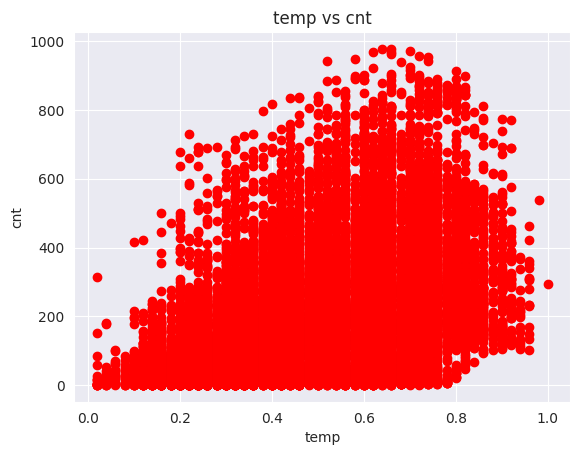

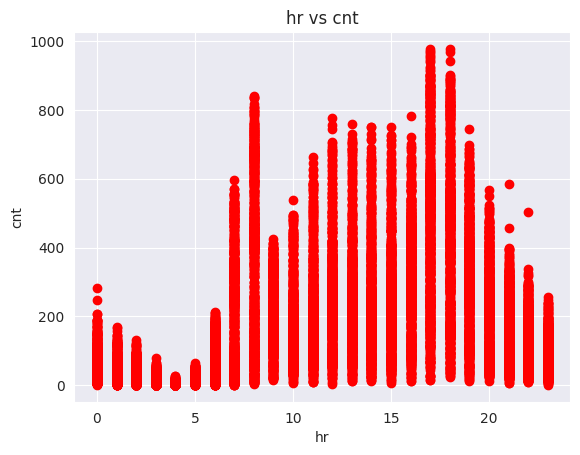

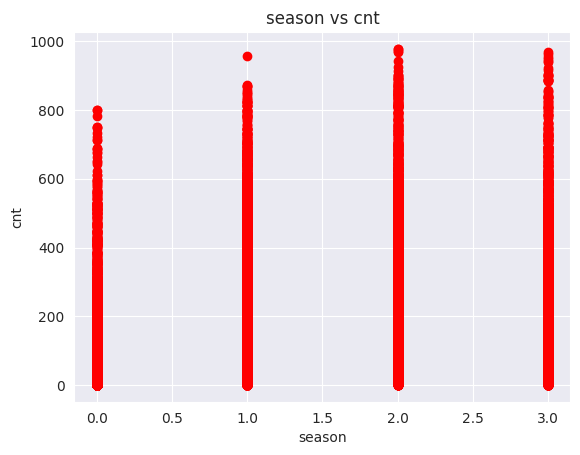

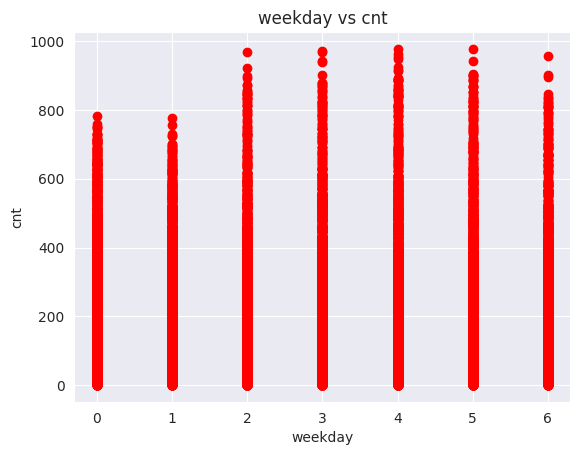

In [7]:
plt.scatter(bike['windspeed'], bike['cnt'], color='red')
plt.title('windspeed vs cnt')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['atemp'], bike['cnt'], color='red')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['temp'], bike['cnt'], color='red')
plt.title('temp vs cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['hr'], bike['cnt'], color='red')
plt.title('hr vs cnt')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['season'], bike['cnt'], color='red')
plt.title('season vs cnt')
plt.xlabel('season')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['weekday'], bike['cnt'], color='red')
plt.title('weekday vs cnt')
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

In [8]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.29839168824766354

In [9]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit','hum']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.33504126537114937